In [1]:
import plotly.express as px 
import matplotlib.pyplot as plt

import json
import utilities
import pandas as pd
import os
import csv

In [2]:
# Find the number of unique scripts ids at each year
fp_base_dir = "/home/c6/Desktop/OpenWPM/jsons/CDX_api/gathered_downloaded_files/fp_javascripts"
non_fp_base_dir = "/home/c6/Desktop/OpenWPM/jsons/CDX_api/gathered_downloaded_files/non_fp_js"
years = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
annualy_script_numbers = {"2010":set(), "2011":set(), "2012":set(), "2013":set(), 
                          "2014":set(), "2015":set(), "2016":set(), "2017":set(), "2018":set(), "2019":set()}

fp_scripts = utilities.get_files_in_a_directory(fp_base_dir)
for fp_script in fp_scripts:
    script_id = fp_script.split("/")[-1].split("|")[-1]
    year = fp_script.split("/")[-1].split("|")[-2][0:4]
    if year in annualy_script_numbers.keys():
        annualy_script_numbers[year].add(script_id)

non_fp_scripts = utilities.get_files_in_a_directory(non_fp_base_dir)
for non_fp_script in non_fp_scripts:
    script_id = non_fp_script.split("/")[-1].split("|")[-1]
    year = non_fp_script.split("/")[-1].split("|")[-2][0:4]
    if year in annualy_script_numbers.keys():
        annualy_script_numbers[year].add(script_id)
        
for year, id_list in annualy_script_numbers.items():
    annualy_script_numbers[year] = list(annualy_script_numbers[year])

In [3]:
fp_base_dir = "/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/fp_files"
non_fp_base_dir = "/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/non_fp_files"
years = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

mouse = {"2010":0, "2011":0, "2012":0, "2013":0, "2014":0, "2015":0, "2016":0, "2017":0, "2018":0, "2019":0}

In [ ]:
# Mouse

In [103]:
# FP scripts
for year in years:
    script_files = utilities.get_files_in_a_directory(os.path.join(fp_base_dir, year, "api_features"))
    for fp_js in script_files:
        date = fp_js.split('/')[-1].split('|')[-2][0:4]
        if date in mouse.keys():
            script_content = utilities.read_list_compressed(fp_js)
                
               # Mouse
            if ("clientX" in script_content and "clientY" in script_content) or \
                ("scrollX" in script_content and "scrollY" in script_content) or \
                ("deltaX" in script_content and "deltaY" in script_content or "deltaZ" in script_content) or \
                ("movementX" in script_content and "movementY" in script_content) or \
                ("screenX" in script_content and "screenY" in script_content) or \
                ("radiusX" in script_content and "radiusY" in script_content) or \
                ("clientX" in script_content and "clientY" in script_content) or \
                ("pageX" in script_content and "pageY" in script_content):
                    if ("mousemove" in script_content or "onmousemove" in script_content):
                        if("click" in script_content and "dblclick" in script_content):
                            if ("wheelDelta" in script_content and "mousewheel" in script_content) or \
                                ("rotationAngle" in script_content):
                                    mouse[date] += 1
                        

In [102]:
 # NON-FP scripts
for year in years:
    script_files = utilities.get_files_in_a_directory(os.path.join(non_fp_base_dir, year, "api_features"))
    for non_fp_js in script_files:
        date = non_fp_js.split('/')[-1].split('|')[-2][0:4]
        if date in mouse.keys():
            script_content = utilities.read_list_compressed(non_fp_js)

             # Mouse
            if ("clientX" in script_content and "clientY" in script_content) or \
                ("scrollX" in script_content and "scrollY" in script_content) or \
                ("deltaX" in script_content and "deltaY" in script_content or "deltaZ" in script_content) or \
                ("movementX" in script_content and "movementY" in script_content) or \
                ("screenX" in script_content and "screenY" in script_content) or \
                ("radiusX" in script_content and "radiusY" in script_content) or \
                ("clientX" in script_content and "clientY" in script_content) or \
                ("pageX" in script_content and "pageY" in script_content):
                    if ("mousemove" in script_content or "onmousemove" on script_content):
                        if("click" in script_content and "dblclick" in script_content):
                            if ("wheelDelta" in script_content and "mousewheel" in script_content) or \
                                ("rotationAngle" in script_content):
                                    mouse[date] += 1


In [104]:
for year, num in mouse.items():
    mouse[year] = round(mouse[year] / len(annualy_script_numbers[year]) *100, 2)

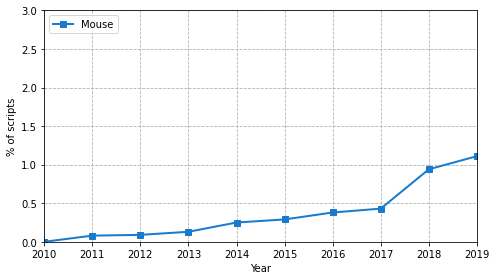

In [106]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)
years = annualy_script_numbers.keys()
fig, ax = plt.subplots(sharey=True, tight_layout=True, figsize=(11, 6))


ax.plot(years, mouse.values(), label='Mouse', linestyle='-',  marker='s', color = '#187bcd',linewidth=2) # increasing- (0-25)
ax.set_xlabel('Year')
ax.set_ylabel('% of scripts')
# tidy up the figure
fig.set_size_inches(7, 4, forward=True)
plt.grid(True, linestyle='--')
plt.ylim([0, 3])
plt.xlim(['2010', '2019'])
ax.legend(loc='upper left')
plt.show()

### Touch 

In [45]:
touch = {"2010":0, "2011":0, "2012":0, "2013":0, "2014":0, "2015":0, "2016":0, "2017":0, "2018":0, "2019":0}

In [107]:
 # NON-FP scripts
for year in years:
    script_files = utilities.get_files_in_a_directory(os.path.join(non_fp_base_dir, year, "api_features"))
    for non_fp_js in script_files:
        date = non_fp_js.split('/')[-1].split('|')[-2][0:4]
        if date in mouse.keys():
            script_content = utilities.read_list_compressed(non_fp_js)

             # Touch
            if ("clientX" in script_content and "clientY" in script_content) or \
                ("radiusX" in script_content and "radiusY" in script_content) or \
                ("screenX" in script_content and "screenY" in script_content) or \
                ("pageX" in script_content and "pageY" in script_content):
                    if ("rotationAngle" in script_content or "altitudeAngle" in script_content or "azimuthAngle" in script_content):
                        if ("TouchEvent" in script_content or "ontouchstart" in script_content or \
                            "touchenter" in script_content or "ontouchenter" in script_content or \
                            "touuchstart" in script_content or "ontouchstart" in script_content):
                            if ("touchleave" in script_content or "ontouchleave" in script_content or \
                                 "touchcancel" in script_content or "ontouchend" in script_content or \
                                 "touchcancel" in script_content):
                                    touch[date] += 1

In [108]:
# FP scripts
for year in years:
    script_files = utilities.get_files_in_a_directory(os.path.join(fp_base_dir, year, "api_features"))
    for fp_js in script_files:
        date = fp_js.split('/')[-1].split('|')[-2][0:4]
        if date in mouse.keys():
            script_content = utilities.read_list_compressed(fp_js)
                
             # Touch
            if ("clientX" in script_content and "clientY" in script_content) or \
                ("radiusX" in script_content and "radiusY" in script_content) or \
                ("screenX" in script_content and "screenY" in script_content) or \
                ("pageX" in script_content and "pageY" in script_content):
                if ("touchmove" in script_content or "changedTouches" in script_content):
                        if ("TouchEvent" in script_content or "ontouchstart" in script_content or \
                            "touchenter" in script_content or "ontouchenter" in script_content or \
                            "touuchstart" in script_content or "ontouchstart" in script_content):
                            if ("touchleave" in script_content or "ontouchleave" in script_content or \
                                 "touchcancel" in script_content or "ontouchend" in script_content or \
                                 "touchcancel" in script_content):
                                    touch[date] += 1
            
            

In [109]:
for year, num in touch.items():
    touch[year] = round(touch[year] / len(annualy_script_numbers[year]) *100, 2)

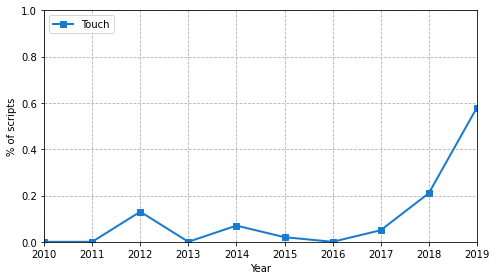

In [110]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)
years = annualy_script_numbers.keys()
fig, ax = plt.subplots(sharey=True, tight_layout=True, figsize=(11, 6))


ax.plot(years, touch.values(), label='Touch', linestyle='-',  marker='s', color = '#187bcd',linewidth=2) # increasing- (0-25)
ax.set_xlabel('Year')
ax.set_ylabel('% of scripts')
# tidy up the figure
fig.set_size_inches(7, 4, forward=True)
plt.grid(True, linestyle='--')
plt.ylim([0, 1])
plt.xlim(['2010', '2019'])
ax.legend(loc='upper left')
plt.show()

In [ ]:
# Storage

In [113]:
performance = {"2010":0, "2011":0, "2012":0, "2013":0, "2014":0, "2015":0, "2016":0, "2017":0, "2018":0, "2019":0}


In [114]:
 # NON-FP scripts
for year in years:
    script_files = utilities.get_files_in_a_directory(os.path.join(non_fp_base_dir, year, "api_features"))
    for non_fp_js in script_files:
        date = non_fp_js.split('/')[-1].split('|')[-2][0:4]
        if date in mouse.keys():
            script_content = utilities.read_list_compressed(non_fp_js)

             # performance
            if("performance" in script_content and "now" in script_content):
                if ("domainLookupStart" in script_content and "domainLookupEnd" in script_content) or \
                    ("responseStart" in script_content and "responseEnd" in script_content) or \
                    ("requestStart" in script_content and "requestEnd" in script_content) or\
                    ("paint" in script_content and "startTime" in script_content and "performanceEntry" in script_content):
                        performance[date] += 1

In [115]:
# FP scripts
for year in years:
    script_files = utilities.get_files_in_a_directory(os.path.join(fp_base_dir, year, "api_features"))
    for fp_js in script_files:
        date = fp_js.split('/')[-1].split('|')[-2][0:4]
        if date in mouse.keys():
            script_content = utilities.read_list_compressed(fp_js)
                
             # performance
            if("performance" in script_content and "now" in script_content):
                if ("domainLookupStart" in script_content and "domainLookupEnd" in script_content) or \
                    ("responseStart" in script_content and "responseEnd" in script_content) or \
                    ("requestStart" in script_content and "requestEnd" in script_content) or\
                    ("paint" in script_content and "startTime" in script_content and "performanceEntry" in script_content):
                        performance[date] += 1
            

In [117]:
for year, num in touch.items():
    performance[year] = round(performance[year] / len(annualy_script_numbers[year]) *100, 2)

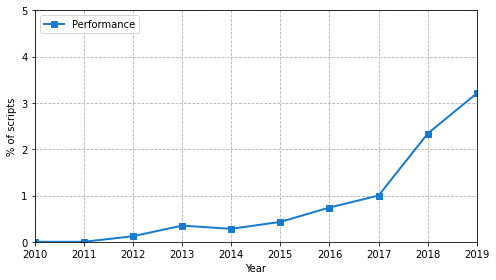

In [120]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)
years = annualy_script_numbers.keys()
fig, ax = plt.subplots(sharey=True, tight_layout=True, figsize=(11, 6))


ax.plot(years, performance.values(), label='Performance', linestyle='-',  marker='s', color = '#187bcd',linewidth=2) # increasing- (0-25)
ax.set_xlabel('Year')
ax.set_ylabel('% of scripts')
# tidy up the figure
fig.set_size_inches(7, 4, forward=True)
plt.grid(True, linestyle='--')
plt.ylim([0, 5])
plt.xlim(['2010', '2019'])
ax.legend(loc='upper left')
plt.show()